### Customer Segmentation Using Unsupervised Learning 

#### Data: https://www.kaggle.com/datasets/alirezachahardoli/customer-data-clustring

#### Objective: Derive customer insights based on their credit card use features

###  **Data preprocessing:**

##### a. Visualize and pre-process the data as appropriate. You might have to use a power, an exponential, or a log transformation.

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer-Data - 2.csv")   # Reading the csv file

In [3]:
df.head() # Printing first five rows to get an idea of the data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
print('Number of Rows =', df.shape[0])     # printing no of rows
print('Number of Columns =', df.shape[1])  # printing no of columns

Number of Rows = 8950
Number of Columns = 18


In [5]:
df.info()    # Printing the info of the data including Non-null count , datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA



##### OBSERVATIONS: All the columns are numeric, except for CUST_ID
##### There are some missing values in the columns 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS'    

In [6]:
# Counting NaN values for each column and creating a DataFrame

# Calculating the number of NaN values in each column, and reset the index to convert the Series into a DataFrame
null_column_df = df.isnull().sum().reset_index()

# Renaming the columns of the DataFrame to 'Column_Name' and 'NaN_Count'
null_column_df.columns = ['Column_Name', 'NaN_Count']

# Sorting the DataFrame by the 'NaN_Count' column in ascending order and reset the index
null_column_df = null_column_df.sort_values(by='NaN_Count').reset_index(drop=True)

# Printing the DataFrame
print(null_column_df)

                         Column_Name  NaN_Count
0                            CUST_ID          0
1                           PAYMENTS          0
2                      PURCHASES_TRX          0
3                   CASH_ADVANCE_TRX          0
4             CASH_ADVANCE_FREQUENCY          0
5   PURCHASES_INSTALLMENTS_FREQUENCY          0
6                   PRC_FULL_PAYMENT          0
7         ONEOFF_PURCHASES_FREQUENCY          0
8                       CASH_ADVANCE          0
9             INSTALLMENTS_PURCHASES          0
10                  ONEOFF_PURCHASES          0
11                         PURCHASES          0
12                 BALANCE_FREQUENCY          0
13                           BALANCE          0
14               PURCHASES_FREQUENCY          0
15                            TENURE          0
16                      CREDIT_LIMIT          1
17                  MINIMUM_PAYMENTS        313


##### CREDIT_LIMIT has 1 missing value
##### MINIMUM_PAYMENTS has 313 missing values

#### Handling Missing values

In [7]:
# Filling missing values in CREDIT_LIMIT with the most frequent value (mode)
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mode()[0])

# Filling missing values in MINIMUM_PAYMENTS with the median value
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

# Verifying that there are no missing values in these columns
print("Missing Values After Imputation:")
print(df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].isnull().sum())

Missing Values After Imputation:
CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
dtype: int64


#### Dropping unneccesary columns

##### The CUST_ID column is an identifier and should be excluded from analysis

In [8]:
# Dropping the 'CUST_ID' column (identifier, not relevant for analysis)
df = df.drop(columns=["CUST_ID"])

##### Understanding Distributions of Features

##### Visualizing the distribution of numerical features to identify skewness or outliers

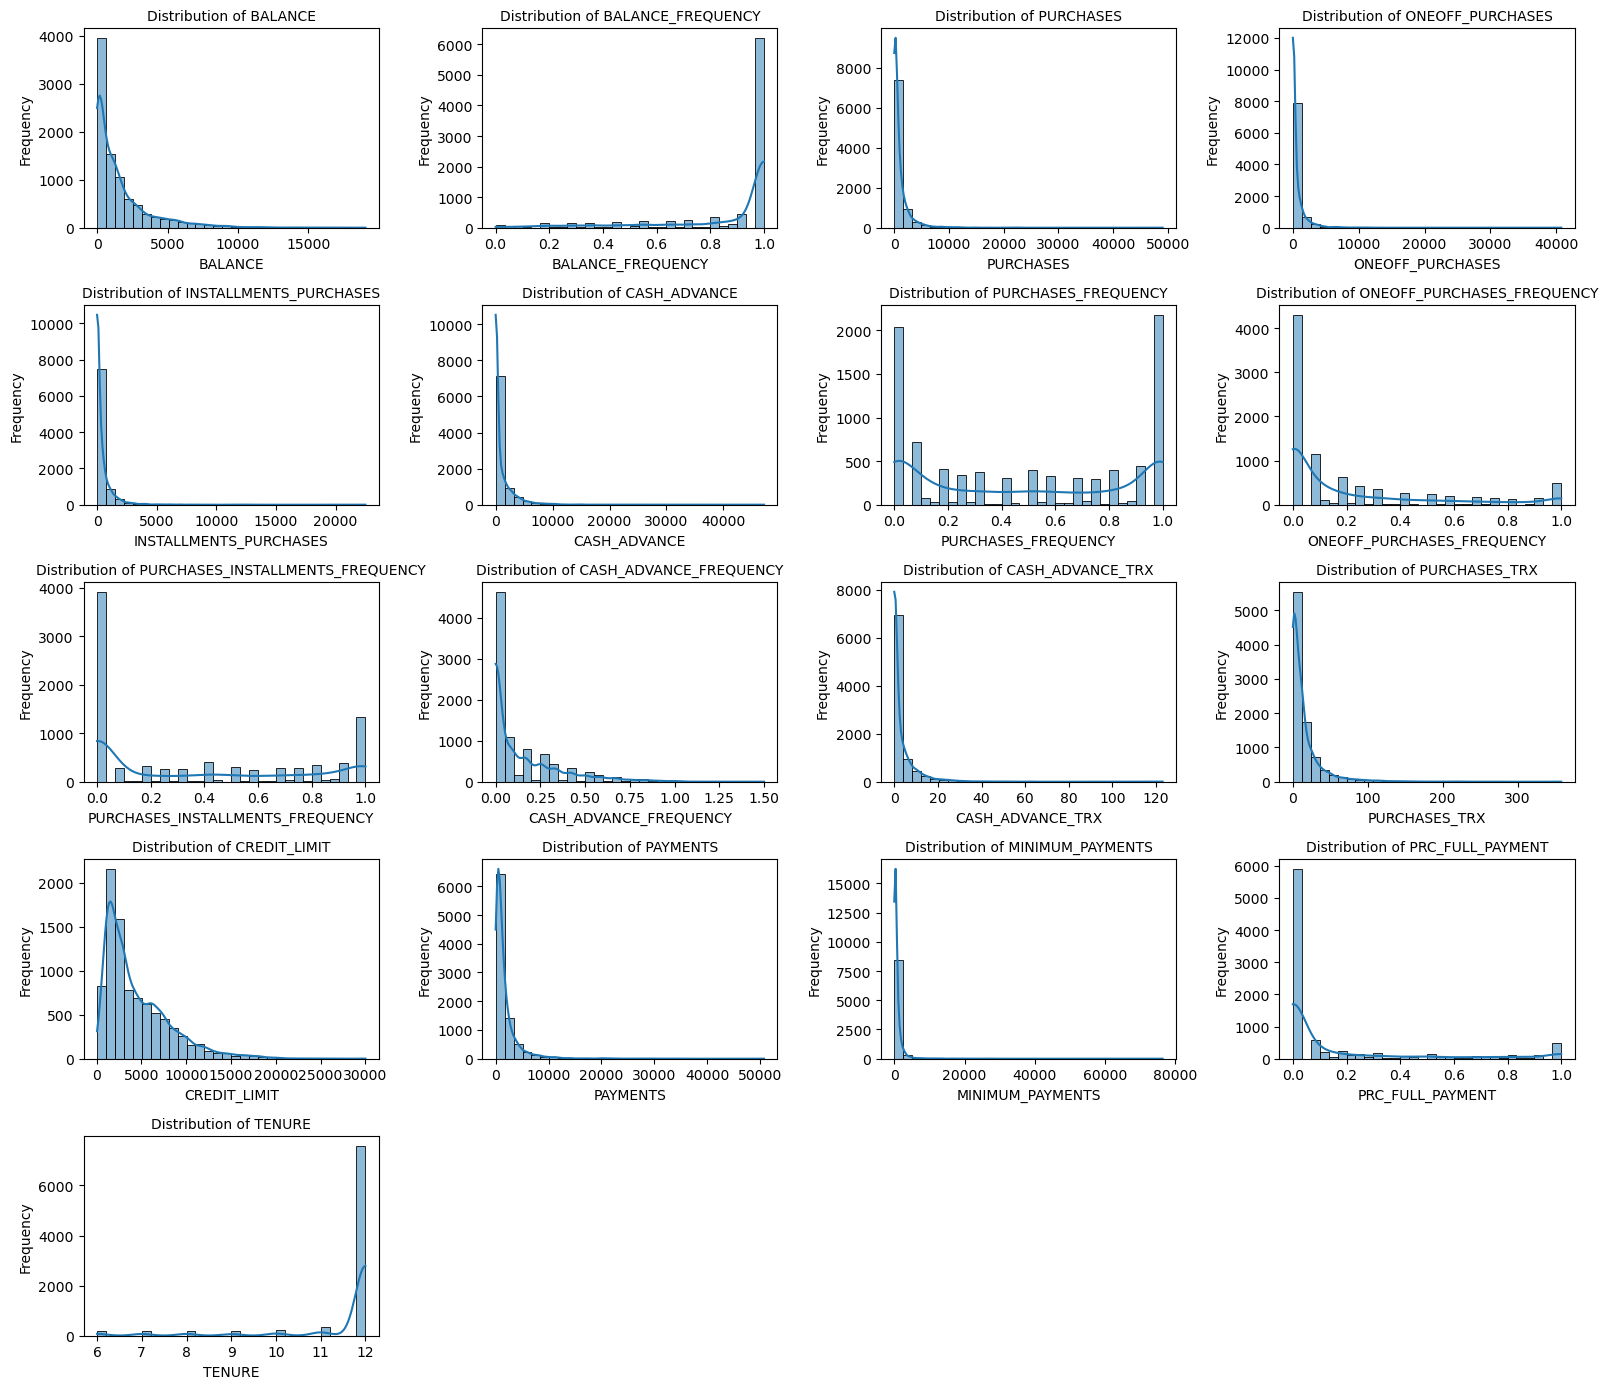

In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Number of features to plot
num_features = len(numeric_columns)

# Setting the figure size 
fig, axes = plt.subplots(nrows=(num_features // 4) + (num_features % 4), 
                         ncols=4, figsize=(16,14))
axes = axes.flatten()  # Flatten for easy indexing

# Plotting histograms
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Removing any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout
plt.tight_layout()
plt.show()


##### Correlation Heatmap
##### Heatmap shows correlations between features to detect multicollinearity and redundant variables


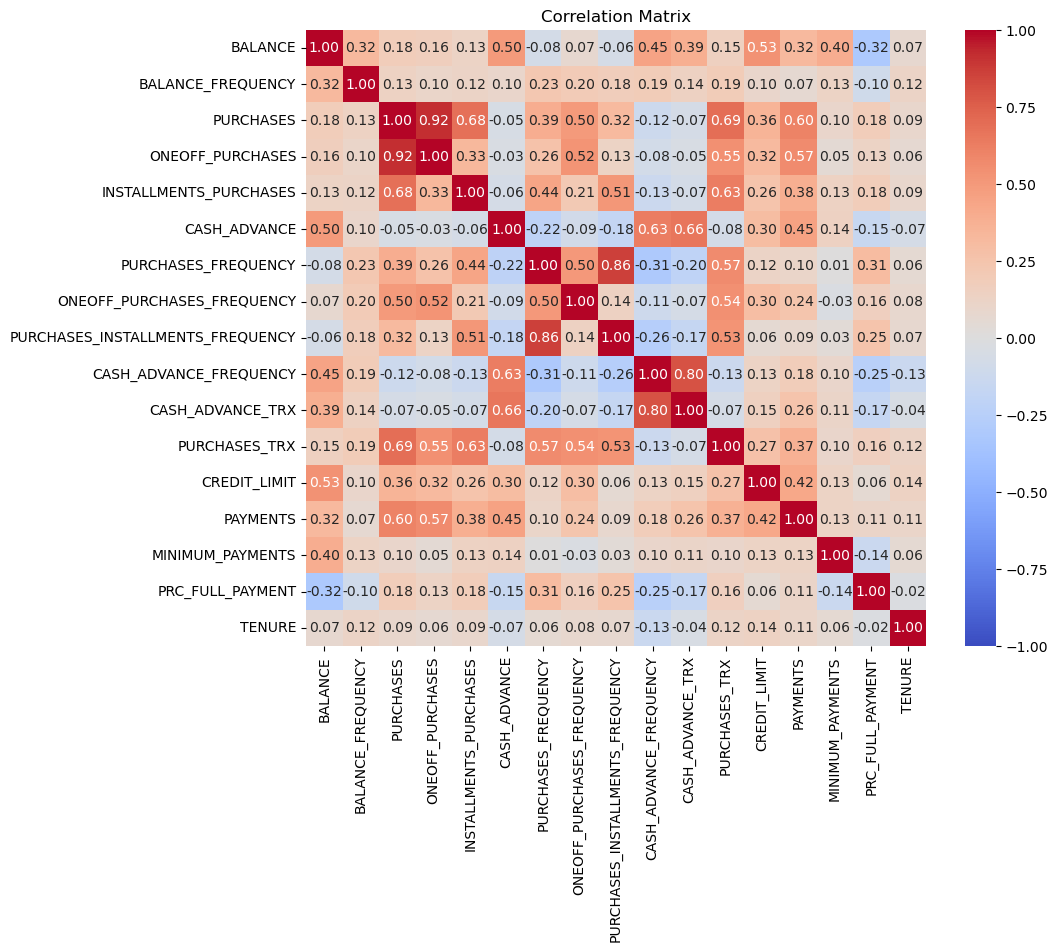

          Feature 1         Feature 2  Correlation
0         PURCHASES  ONEOFF_PURCHASES     0.916845
1  ONEOFF_PURCHASES         PURCHASES     0.916845


In [10]:
# Computing correlation matrix
corr_matrix = df.corr()

# Plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Unstacking the correlation matrix to create a series
corr_pairs = corr_matrix.unstack()

# Filtering for correlations greater than 0.9 or less than -0.9, excluding self-correlations
high_corr_pairs = corr_pairs[(corr_pairs > 0.9) | (corr_pairs < -0.9)]
high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) != high_corr_pairs.index.get_level_values(1)]

# Converting to a DataFrame
high_corr_df = high_corr_pairs.reset_index()
high_corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

print(high_corr_df)


##### Outlier Detection


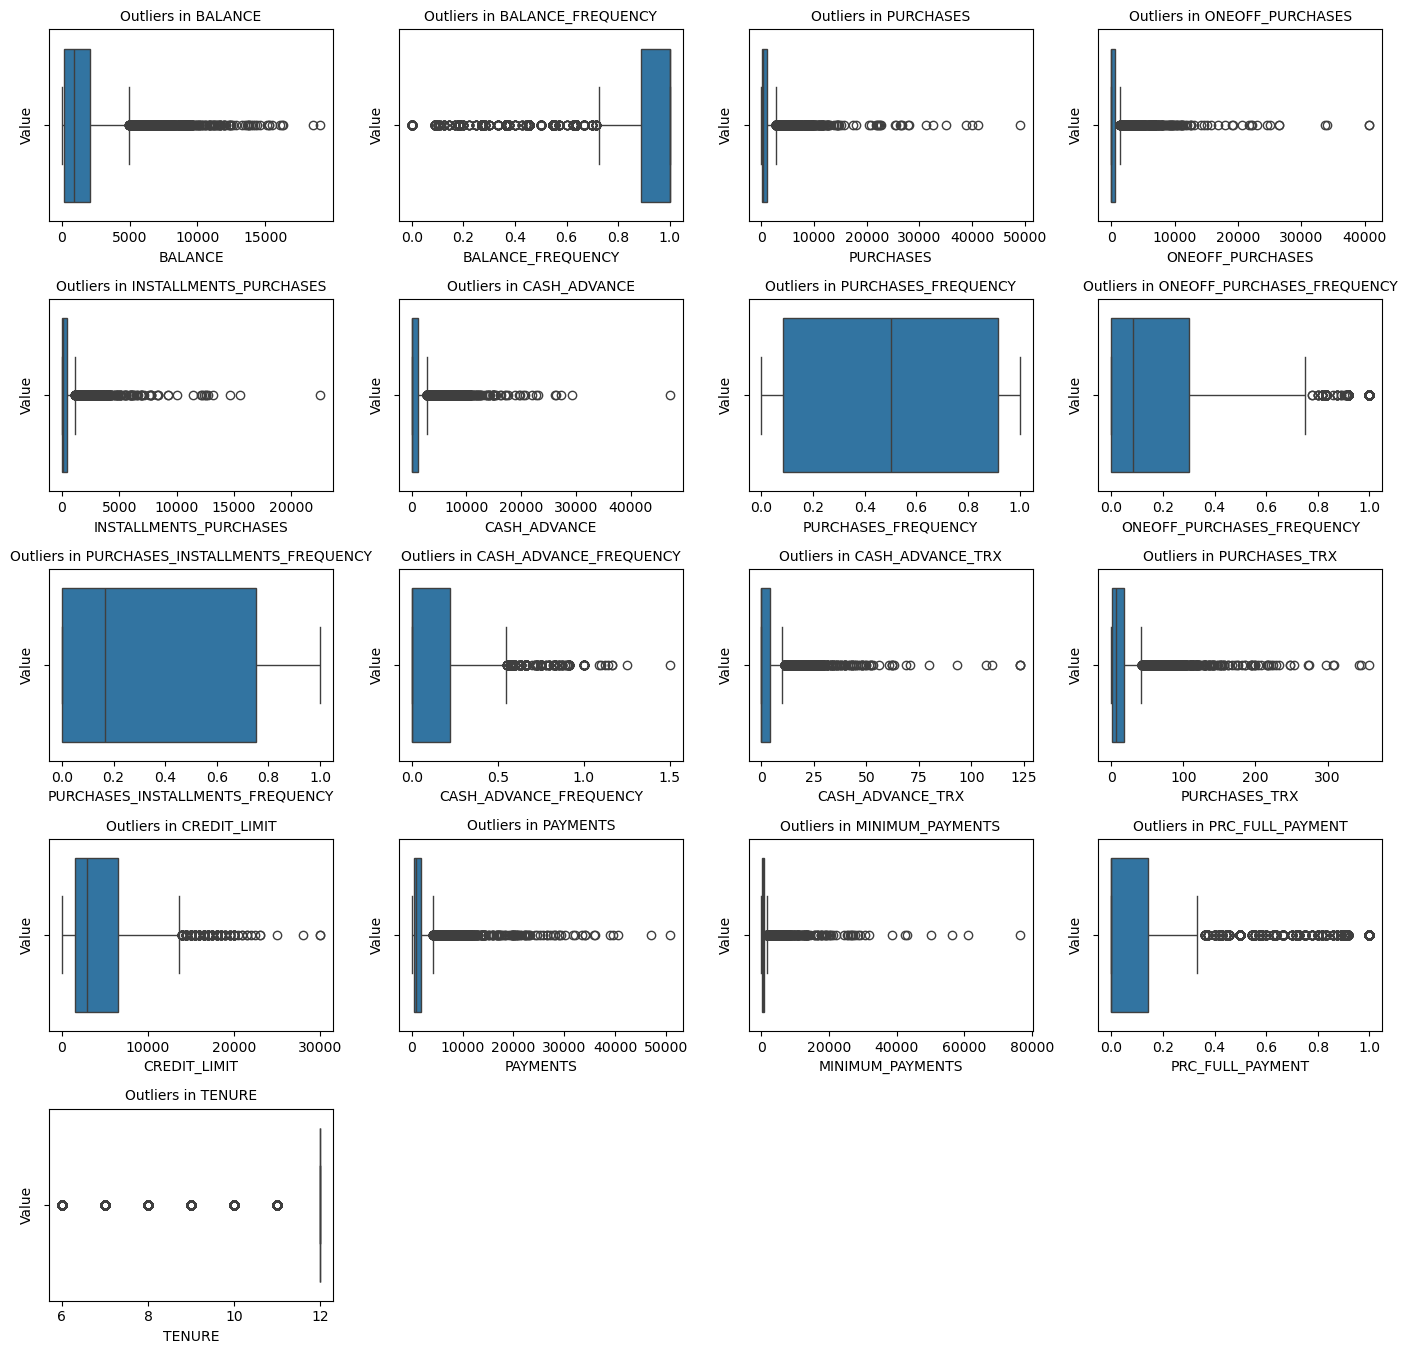

In [11]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Number of features to plot
num_features = len(numeric_columns)

# Setting up the figure size (adjust width and height as needed)
fig, axes = plt.subplots(nrows=(num_features // 2) + (num_features % 2), 
                         ncols=4, figsize=(14, 24))
axes = axes.flatten()  # Flatten the grid for easy indexing

# Creating box plots
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Outliers in {col}', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

# Removing any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout to avoid overlap
plt.tight_layout()
plt.show()


#### Vizualizing Distributions of Skewed features

In [12]:
# Calculating skewness for all columns
skewness = df.skew()

# Determining the type of skewness
skewness_type = ['Positive' if value > 0 else 'Negative' if value < 0 else 'Symmetric' for value in skewness]

# Combining skewness values with their types into a DataFrame for better visualization
skewness_summary = pd.DataFrame({
    'Feature': skewness.index,
    'Skewness': skewness.values,
    'Skewness_Type': skewness_type
}).sort_values(by='Skewness', key=abs, ascending=False)  # Sort by absolute skewness

# Displaying the skewness summary
print(skewness_summary)

                             Feature   Skewness Skewness_Type
14                  MINIMUM_PAYMENTS  13.852446      Positive
3                   ONEOFF_PURCHASES  10.045083      Positive
2                          PURCHASES   8.144269      Positive
4             INSTALLMENTS_PURCHASES   7.299120      Positive
13                          PAYMENTS   5.907620      Positive
10                  CASH_ADVANCE_TRX   5.721298      Positive
5                       CASH_ADVANCE   5.166609      Positive
11                     PURCHASES_TRX   4.630655      Positive
16                            TENURE  -2.943017      Negative
0                            BALANCE   2.393386      Positive
1                  BALANCE_FREQUENCY  -2.023266      Negative
15                  PRC_FULL_PAYMENT   1.942820      Positive
9             CASH_ADVANCE_FREQUENCY   1.828686      Positive
7         ONEOFF_PURCHASES_FREQUENCY   1.535613      Positive
12                      CREDIT_LIMIT   1.522636      Positive
8   PURC

In [13]:
# Calculating skewness for all columns
skewness = df.skew()

# Determining the type of skewness
def skewness_category(value):
    if abs(value) > 1:
        return "Highly Skewed"
    elif 0.5 < abs(value) <= 1:
        return "Moderately Skewed"
    else:
        return "Approximately Symmetric"

# Categorizing skewness based on thresholds
skewness_category_list = [skewness_category(value) for value in skewness]

# Combining skewness values with their categories into a DataFrame
skewness_summary = pd.DataFrame({
    'Feature': skewness.index,
    'Skewness': skewness.values,
    'Skewness_Category': skewness_category_list
})

# Sorting by absolute skewness (descending)
skewness_summary = skewness_summary.sort_values(by='Skewness', key=abs, ascending=False)

# Displaying the skewness summary
print(skewness_summary)


                             Feature   Skewness        Skewness_Category
14                  MINIMUM_PAYMENTS  13.852446            Highly Skewed
3                   ONEOFF_PURCHASES  10.045083            Highly Skewed
2                          PURCHASES   8.144269            Highly Skewed
4             INSTALLMENTS_PURCHASES   7.299120            Highly Skewed
13                          PAYMENTS   5.907620            Highly Skewed
10                  CASH_ADVANCE_TRX   5.721298            Highly Skewed
5                       CASH_ADVANCE   5.166609            Highly Skewed
11                     PURCHASES_TRX   4.630655            Highly Skewed
16                            TENURE  -2.943017            Highly Skewed
0                            BALANCE   2.393386            Highly Skewed
1                  BALANCE_FREQUENCY  -2.023266            Highly Skewed
15                  PRC_FULL_PAYMENT   1.942820            Highly Skewed
9             CASH_ADVANCE_FREQUENCY   1.828686    

#### Transformations

##### Log Transformation: Suitable for highly positively skewed features with all positive values.
##### Square Root Transformation: Suitable for moderately positively skewed features.
##### Exponential Transformation: Suitable for negatively skewed features.

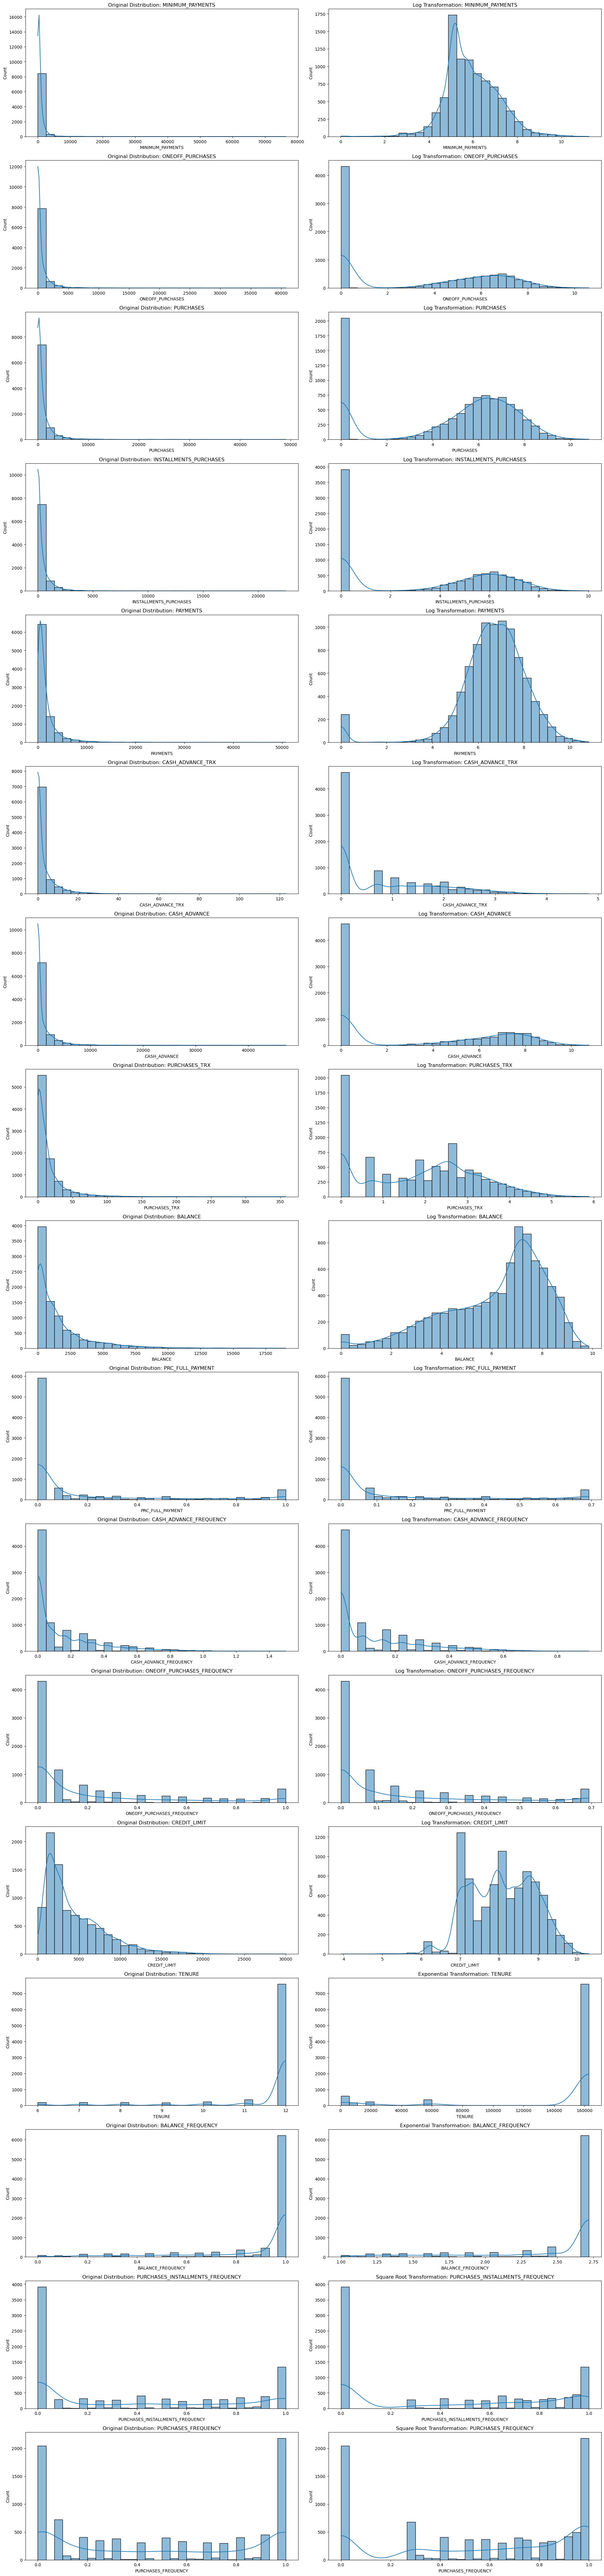

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initializing a dictionary to hold the transformed data
transformed_data = {}

# Defining the features based on skewness categories
highly_skewed_positive = [
    'MINIMUM_PAYMENTS', 'ONEOFF_PURCHASES', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 
    'PAYMENTS', 'CASH_ADVANCE_TRX', 'CASH_ADVANCE', 'PURCHASES_TRX', 'BALANCE', 
    'PRC_FULL_PAYMENT', 'CASH_ADVANCE_FREQUENCY', 
    'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT'
]

highly_skewed_negative = ['TENURE', 'BALANCE_FREQUENCY']

moderate_or_symmetric = [
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY'
]

# Applying transformations: Log for positive skew, Exponential for negative skew
for col in highly_skewed_positive:
    transformed_data[f'{col}_log'] = np.log1p(df[col])  # log1p handles zeros

for col in highly_skewed_negative:
    transformed_data[f'{col}_exp'] = np.exp(df[col])  # Exponential transformation

# Creating subplots for the transformations
fig, axes = plt.subplots(nrows=len(highly_skewed_positive) + len(highly_skewed_negative) + len(moderate_or_symmetric), 
                         ncols=2, figsize=(20, (len(highly_skewed_positive) + len(highly_skewed_negative) + len(moderate_or_symmetric)) * 5))

axes = axes.flatten()

# Plotting original vs transformed distributions
i = 0
for col in highly_skewed_positive:
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Original Distribution: {col}')
    i += 1
    sns.histplot(transformed_data[f'{col}_log'], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Log Transformation: {col}')
    i += 1

for col in highly_skewed_negative:
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Original Distribution: {col}')
    i += 1
    sns.histplot(transformed_data[f'{col}_exp'], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Exponential Transformation: {col}')
    i += 1

for col in moderate_or_symmetric: # (Power/Square Root Transformation)
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Original Distribution: {col}')
    i += 1
    sns.histplot(np.sqrt(df[col]), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Square Root Transformation: {col}')
    i += 1

# Adjusting layout and show plots
plt.tight_layout()
plt.show()


##### b. You may find and drop some of the highly correlated or inappropriate variables, or encode discretevariables as appropriate

#### Correlations

Highly correlated feature pairs (abs(correlation) > 0.9):
ONEOFF_PURCHASES and PURCHASES

Features to be dropped due to high correlation:
{'ONEOFF_PURCHASES'}


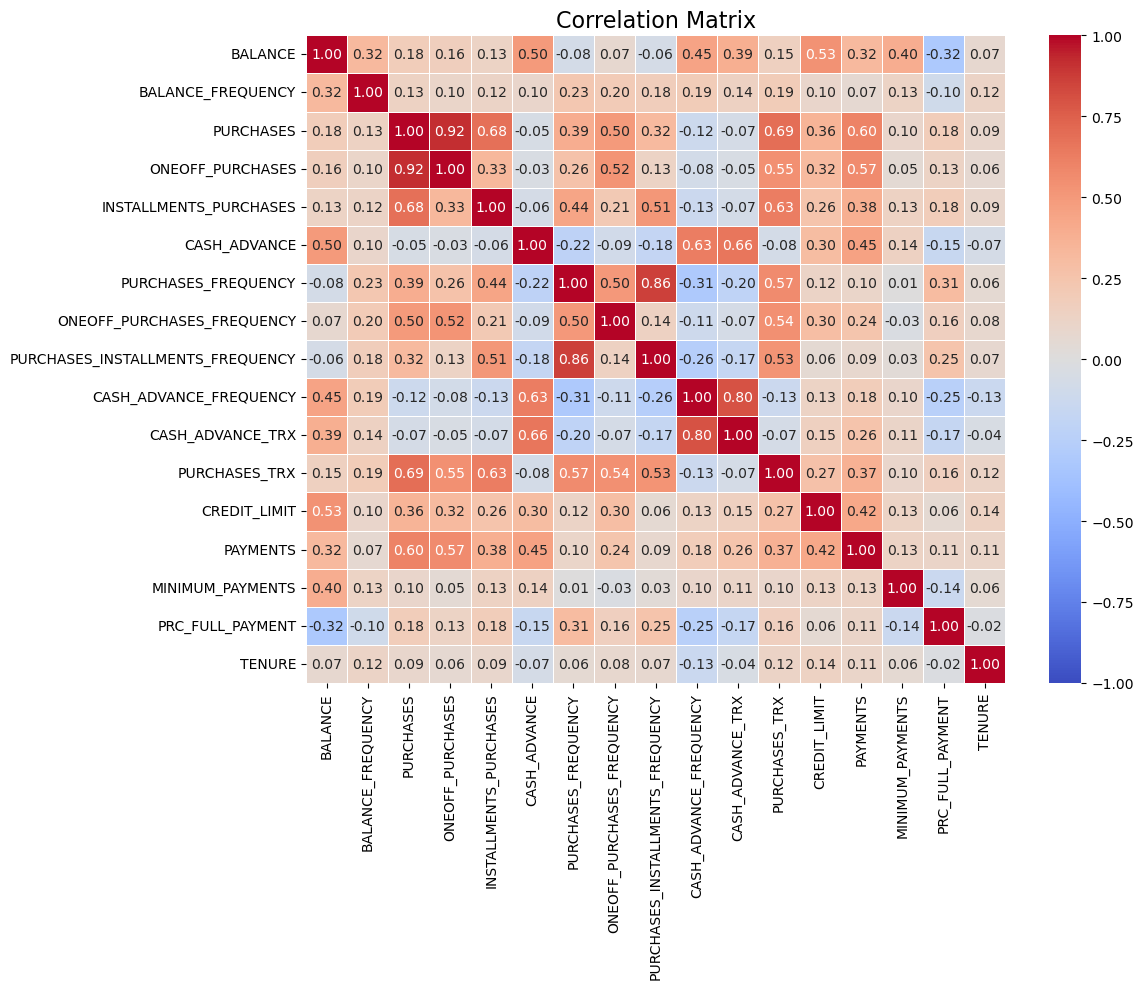

In [15]:
##### Computing the correlation matrix
correlation_matrix = df.corr()

# Setting a threshold for highly correlated features
correlation_threshold = 0.9

# Initializing a set to store highly correlated features
highly_correlated_features = set()

# Initializing a list to store the pairs of highly correlated features
correlation_pairs = []

# Looping through the correlation matrix to find pairs with high correlation
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            # Record the highly correlated pair
            feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            correlation_pairs.append(feature_pair)
            
            # Add the feature with higher index to the set for removal (drop one feature in the pair)
            highly_correlated_features.add(correlation_matrix.columns[i])

# Printing the highly correlated feature pairs
print("Highly correlated feature pairs (abs(correlation) > 0.9):")
for pair in correlation_pairs:
    print(f"{pair[0]} and {pair[1]}")

# Printing the features to be dropped
print("\nFeatures to be dropped due to high correlation:")
print(highly_correlated_features)

# Dropping the highly correlated features
df.drop(columns=highly_correlated_features, inplace=True)

# Setting up the matplotlib figure for heatmap
plt.figure(figsize=(12, 10))

# Plotting the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()


##### Highly correlated feature pairs (abs(correlation) > 0.9) are ONEOFF_PURCHASES and PURCHASES
##### So i have dropped one of them which is ONEOFF_PURCHASES

In [16]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

##### Based on the data types all the variables are either numeric (float64 or int64), which means no categorical variables are present that would require encoding (one-hot encoding or label encoding)

#### Feature Scaling

##### Clustering algorithms like K-Means and DBSCAN are sensitive to the scale of the features 

##### So Standardizing or normalizing the features is crucial before applying any clustering algorithm
##### Standardization (scaling features to have a mean of 0 and variance of 1)
##### Normalization (scaling features to a [0, 1] range)
##### So I have standardized the data as below

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


### Clustering:

#### 2a: Train K-Means and Find the Appropriate Number of Clusters (k)

### K-MEANS CLUSTERING

In the below code I have implemented the Elbow Method using K-Means clustering to find the optimal number of clusters for the dataset. First, I tested different cluster counts (k) from 1 to 10 and recorded their inertia values, which measure how well data points fit into clusters

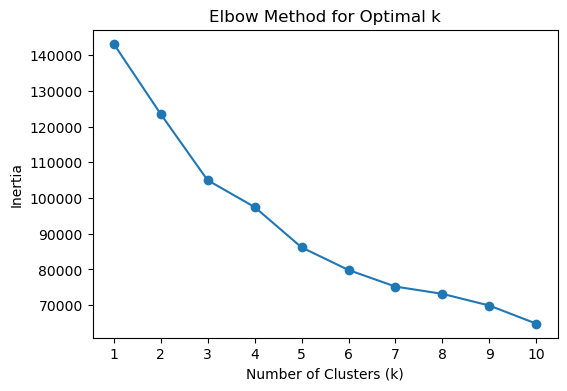

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of k values to test
k_range = range(1, 11)

# List to store inertia values
inertia_values = []

# Fitting K-Means for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Set x-ticks to display all integers from 1 to 10
plt.xticks(k_range)

plt.show()


##### OBSERVATIONS:
##### The drop from 1 to 2 and 2 to 3 is sharper, but after 3, the decline continues gradually
##### So the k value can be in the range 3 to 7


##### To validate the best k, I have used the silhouette score to assess how well-defined the clusters are for different values of k
##### A higher silhouette score indicates better-defined clusters

In the below code I have used silhouette scores to evaluate the quality of clustering for different values of k (from 2 to 10). For each k, I applied K-Means clustering, calculated the silhouette score—a measure of how well-separated the clusters are—and stored the results

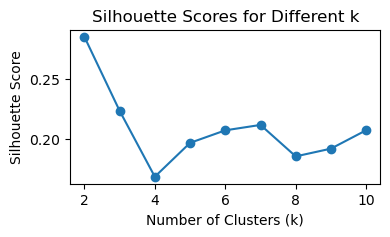

Silhouette score for k=2: 0.2849309366674305
Silhouette score for k=3: 0.22351944015098274
Silhouette score for k=4: 0.16879596980883926
Silhouette score for k=5: 0.19687904265671213
Silhouette score for k=6: 0.2072801978342878
Silhouette score for k=7: 0.2117645455856577
Silhouette score for k=8: 0.1856737868943596
Silhouette score for k=9: 0.19209047131361756
Silhouette score for k=10: 0.20736740071415347


In [97]:
from sklearn.metrics import silhouette_score

# List to store silhouette scores for each k
silhouette_scores = []

# Computing silhouette scores for each k
for k in range(2, 11):  # Start from 2 as silhouette score needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting silhouette scores for each k
plt.figure(figsize=(4,2))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Printing the silhouette scores for reference
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette score for k={k}: {score}")


#### Silhouette Score:
##### The silhouette score is highest for k=2 
##### k=3 has value near to that of k=2 

##### For k =2,3,5,6,7 the value is high compared to other values.So I have chosen to check t-SNE for these values

#### b. Train DBSCAN, and see if by varying MinPts and ε, you can get the same number of clusters as kmeans.

##### The DBSCAN algorithm is used to identify clusters of varying shapes and sizes based on density. Unlike K-Means, DBSCAN doesn’t require the number of clusters in advance. Instead, it works by defining clusters based on two parameters:

##### MinPts (minimum points): Minimum number of points required to form a dense region (cluster).
##### ε (epsilon): The maximum distance between two points to be considered neighbors.

In the below code I have used DBSCAN clustering to explore how different values of MinPts and epsilon (ε) affect the number of clusters. I tested combinations of MinPts (values like 5, 10, 15, 20) and epsilon (values like 0.3, 0.5, 0.8, 1) to see how the algorithm identifies clusters. For each combination, I applied DBSCAN and counted the number of unique clusters

In [44]:
import numpy as np
from sklearn.cluster import DBSCAN

# Range for MinPts and epsilon (ε)
min_pts_range = [5,10,15,20]
epsilon_range = [0.3,0.5,0.8,1]

# Creating an empty list to store the results
dbscan_results = []

for min_pts in min_pts_range:
    for epsilon in epsilon_range:
        # Applying DBSCAN with the current parameters
        dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
        dbscan_labels = dbscan.fit_predict(df_scaled)
        
        # Getting the number of clusters (excluding noise points labeled as -1)
        unique_clusters = len(np.unique(dbscan_labels[dbscan_labels != -1]))  # Excluding -1 (noise)

        # Storing the results
        dbscan_results.append((min_pts, epsilon, unique_clusters))

for result in dbscan_results:
    print(f"MinPts: {result[0]}, Epsilon: {result[1]}, Number of Clusters: {result[2]}")

MinPts: 5, Epsilon: 0.3, Number of Clusters: 46
MinPts: 5, Epsilon: 0.5, Number of Clusters: 37
MinPts: 5, Epsilon: 0.8, Number of Clusters: 20
MinPts: 5, Epsilon: 1, Number of Clusters: 15
MinPts: 10, Epsilon: 0.3, Number of Clusters: 12
MinPts: 10, Epsilon: 0.5, Number of Clusters: 9
MinPts: 10, Epsilon: 0.8, Number of Clusters: 7
MinPts: 10, Epsilon: 1, Number of Clusters: 3
MinPts: 15, Epsilon: 0.3, Number of Clusters: 6
MinPts: 15, Epsilon: 0.5, Number of Clusters: 3
MinPts: 15, Epsilon: 0.8, Number of Clusters: 6
MinPts: 15, Epsilon: 1, Number of Clusters: 3
MinPts: 20, Epsilon: 0.3, Number of Clusters: 5
MinPts: 20, Epsilon: 0.5, Number of Clusters: 5
MinPts: 20, Epsilon: 0.8, Number of Clusters: 3
MinPts: 20, Epsilon: 1, Number of Clusters: 2


##### The above results match the previous k-means results.
##### Values of k = 3,5,6,7 are most common values for the no of clusters

#### c. Using the cluster assignment as the label, visualize the t-sne embedding.

Here,I have applied DBSCAN clustering with specific values for MinPts (20) and epsilon (0.8) [Corresponding to 3 clusters]to the dataset.I have used  the fit_predict method to compute the cluster assignments for each data point. 

In [98]:
from sklearn.cluster import DBSCAN

# Defining optimal MinPts and epsilon (ε)
min_pts = 20 # Example MinPts value
epsilon = 0.8  # Example epsilon value

# Applying DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Printing out the labels (cluster assignments)
print(dbscan_labels)


[ 0 -1 -1 ... -1 -1 -1]


In the below code I have used t-SNE to reduce the dataset to two dimensions for visualization. After performing DBSCAN clustering, I plotted the t-SNE embedding with each point colored based on its DBSCAN cluster label. This scatter plot helps to visually assess how well the clusters are separated in the lower-dimensional space.

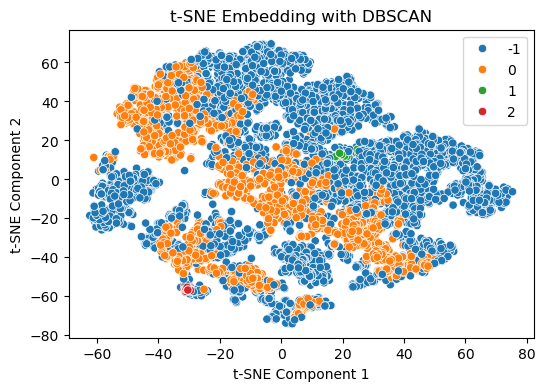

In [99]:
# t-SNE embedding for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=1000)
tsne_embedding = tsne.fit_transform(df_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=tsne_embedding[:, 0], 
    y=tsne_embedding[:, 1], 
    hue=dbscan_labels, 
    palette='tab10', 
    legend="full"
)
plt.title("t-SNE Embedding with DBSCAN")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

##### DBSCAN: The eps (epsilon) and min_samples (MinPts) parameters determine the size and density of the clusters. 
##### The -1 label corresponds to the noise points (outliers), while 0, 1, and 2 are the valid clusters. The presence of -1 suggests that DBSCAN has classified some points as outliers, 
##### Above diagram suggests that the DBSCAN is not performing that well

In the below code I have performed KMeans clustering with different values of k (2, 3, 5, 6, 7) and visualized the results using t-SNE for dimensionality reduction. For each k, I applied KMeans clustering, then used t-SNE to embed the data into two dimensions

##### For k =2,3,5,6,7 the value is high compared to other values.So I have chosen to check t-SNE for these values

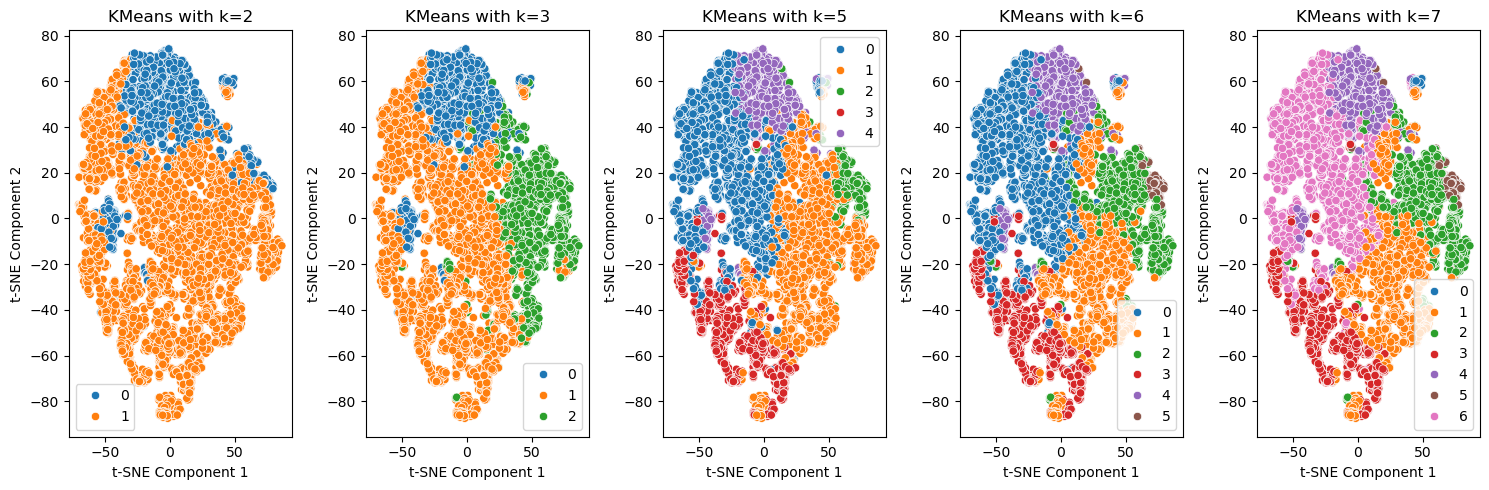

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# List of k values to visualize
k_values = [2, 3, 5, 6, 7]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, k in enumerate(k_values):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    kmeans_labels = kmeans.labels_
    
    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    tsne_embedding = tsne.fit_transform(df_scaled)
    
    # Plot t-SNE results
    ax = axes[i]
    sns.scatterplot(
        x=tsne_embedding[:, 0], 
        y=tsne_embedding[:, 1], 
        hue=kmeans_labels, 
        palette='tab10', 
        legend="full", 
        ax=ax
    )
    
    ax.set_title(f'KMeans with k={k}')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


#### OBSERVATIONS:
##### The clustering is good for k =3 when compared to that of others
##### k=2 doesnot make enough clusters. K =6,7 also does not give good clustering results
##### The clustering with k=5 is also good, but it leads to unnecessary clustering, so I have chosen k =3 as the optimal value.


In [90]:
from sklearn.cluster import KMeans

# Set the optimal number of clusters (k)
optimal_k = 3

# Applying KMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)

# Getting the labels (cluster assignments)
k_labels = kmeans.labels_

# Printing the cluster labels to confirm
print(k_labels)


[1 0 2 ... 1 1 1]


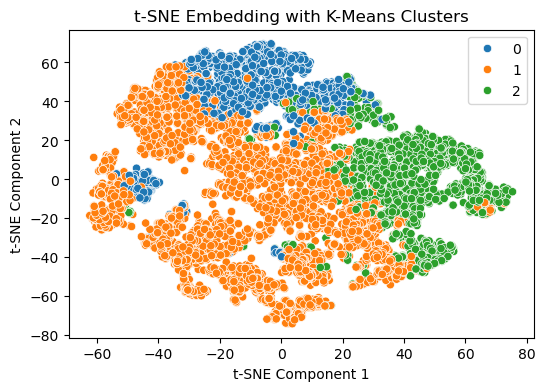

In [91]:
# t-SNE embedding for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=1000)
tsne_embedding = tsne.fit_transform(df_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=tsne_embedding[:, 0], 
    y=tsne_embedding[:, 1], 
    hue=k_labels, 
    palette='tab10', 
    legend="full"
)
plt.title("t-SNE Embedding with K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

#### d. Try to give each cluster a name, such as “reckless spenders”.

##### The following  things can be analyzed to cluster the customers into three segments
##### Payment behavior: Cluster customers based on their payment patterns (e.g., full payments, minimum payments).
##### Credit Limit Usage: Whether customers are utilizing their full credit limit or only a fraction of it.
##### Frequency of Transactions: Clusters that make purchases or cash advances more frequently.

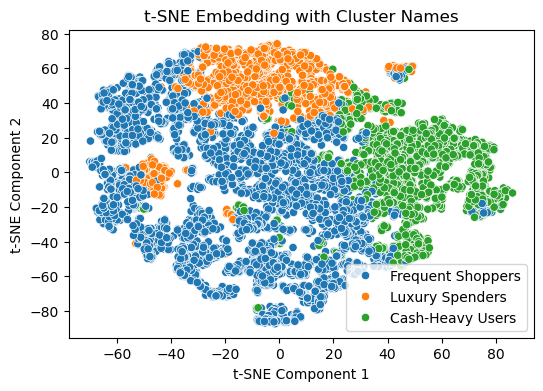

In [95]:
# Creating a DataFrame with the cluster labels
df_with_labels = df_scaled.copy()
df_with_labels['Cluster'] = k_labels

# Defining cluster names based on characteristics
cluster_names = {
    0: "Luxury Spenders",    # Customers with large, one-time purchases
    1: "Frequent Shoppers",  # Customers with regular, smaller purchases
    2: "Cash-Heavy Users",   # Customers who frequently rely on cash advances
}


# Adding the cluster names to the DataFrame
df_with_labels['Cluster_Name'] = df_with_labels['Cluster'].map(cluster_names)

# Applying t-SNE for 2D visualization (assuming df_scaled is your input data)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_embedding = tsne.fit_transform(df_scaled)

# Visualizing the clusters with the new labels
plt.figure(figsize=(6,4))
sns.scatterplot(x=tsne_embedding[:, 0], y=tsne_embedding[:, 1], hue=df_with_labels['Cluster_Name'], palette='tab10')
plt.title("t-SNE Embedding with Cluster Names")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()


##### Luxury Spenders: High values in ONEOFF_PURCHASES and PURCHASES; use cards for large, one-time purchases; target with higher credit limits and exclusive rewards

##### Frequent Shoppers: High PURCHASES_FREQUENCY, PURCHASES_TRX, and INSTALLMENTS_PURCHASES; make frequent small transactions; target with rewards like cashback on daily purchases

##### Cash-Heavy Users: High CASH_ADVANCE and CASH_ADVANCE_FREQUENCY, low PURCHASES; prioritize liquidity; target with reduced cash advance fees

#### 3. PCA: Try to find if there are only a few components/directions that explain most of the variance in the data.

#### Normalizing the Data and Training PCA on the Appropriate Variables

Normalization: In the below code  I have first standardized the data using StandardScaler to ensure each feature has a mean of 0 and a standard deviation of 1. This is important for PCA as it is sensitive to the scale of the data.
Then PCA model is fit to the normalized data. The explained_variance_ratio_ gives the proportion of the variance explained by each principal component

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Normalizing the data (standardizing each feature)
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_scaled)  

# Training PCA on normalized data
pca = PCA()
pca.fit(data_normalized)

# Printing the explained variance ratio for each component
print(f"Explained variance ratio for each component: {pca.explained_variance_ratio_}")


Explained variance ratio for each component: [0.26011543 0.21470043 0.08298738 0.07789627 0.06461801 0.05778293
 0.05066399 0.04448915 0.04034521 0.03188861 0.01904692 0.01702309
 0.01516708 0.01096818 0.00947029 0.00283703]


#### b. Plot the variance explained versus PCA dimensions

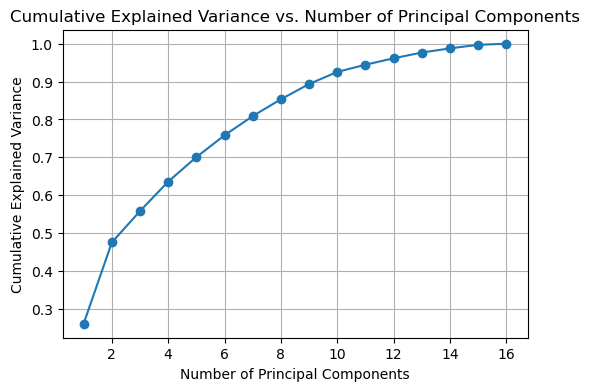

In [64]:
# Plotting the explained variance ratio
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


##### OBSERVATIONS:
##### The cumulative explained variance increases rapidly as more components are added, and after a certain point, adding more components doesn't significantly improve the explained variance. This indicates that most of the important variance is explained by the first few components, while additional components offer diminishing returns

#### c. Reconstruct the data with various numbers of PCA dimensions, and compute the MSE.

In the below code I have tested how the number of principal components in PCA affects the reconstruction quality of the data by calculating the Mean Squared Error (MSE) between the original and reconstructed datasets. For each specified number of components (2, 5, 10, 15, 16), I performed dimensionality reduction, reconstructed the data, and computed the MSE.

MSE with 2 components: 0.5251841404847282
MSE with 5 components: 0.29968248709641543
MSE with 10 components: 0.07451259796830274
MSE with 15 components: 0.0028370272714176047
MSE with 16 components: 2.596398244018479e-30


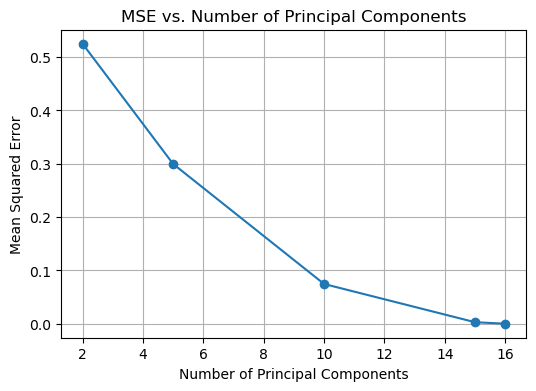

In [66]:
from sklearn.metrics import mean_squared_error

# Number of principal components to test
pca_components = [2, 5, 10, 15,16]

# Initializing list to store MSE values
mse_values = []

# Reconstructing the data and computing the MSE for different numbers of components
for n_components in pca_components:
    
    # Training PCA with the specified number of components
    pca = PCA(n_components=n_components)
    data_reduced = pca.fit_transform(data_normalized)         # Project the data onto the first n components
    data_reconstructed = pca.inverse_transform(data_reduced)  # Reconstruct the data from the reduced dimensions
    
    # Computing the MSE between the original and reconstructed data
    mse = mean_squared_error(data_normalized, data_reconstructed)
    mse_values.append(mse)
    print(f'MSE with {n_components} components: {mse}')

# Plotting the MSE for different numbers of PCA components
plt.figure(figsize=(6,4))
plt.plot(pca_components, mse_values, marker='o')
plt.title('MSE vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


##### OBSERVATIONS:
 ##### As the number of components increased, the MSE decreased, with the best results expected when using the full set of principal components. 
 ##### The Mean Squared Error (MSE) decreases as the number of principal components increases because more components allow for a more accurate reconstruction of the original data

### REFERENCES:
##### EE353_769 13 Clustering.pdf  
[ https://drive.google.com/file/d/1aAPxfHbXl_6-yVLbbnHsgXyNJqHjVOE3/view?usp=drive_link ]
##### EE353_769 14 Dimension Reduction.pdf 
[ https://drive.google.com/file/d/1BzrxP2i150JaPn5CenTcUvYXMMl6eXNq/view?usp=drive_link ]
##### Chatgpt promts: Various clustering methods implementation in python,t-SNE, PCA in python

# ***THANKYOU 😃***